In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [2]:
data_import = pd.read_csv('/Users/sitanshurupani/Data Science Coursework/Sem 4/GQP - National Parks/DataSpell Project/Data/Daily_attendance.csv')

In [3]:
all_years_test = data_import
all_years_test.set_index('Full_Date', inplace=True)

In [4]:
all_years_test.index = pd.to_datetime(all_years_test.index)
ds = all_years_test.index.to_series()
all_years_test['YEAR'] = ds.dt.year
all_years_test['MONTH'] = ds.dt.month
all_years_test['DAY_OF_WEEK'] = ds.dt.dayofweek
all_years_test['DAY'] = ds.dt.day
all_years_test['value'] = all_years_test['value'].astype(int)

In [5]:
all_years_test.corr()

,value,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_gust,rain_1h,snow_1h,federal_holiday_flag,school_holiday_flag,YEAR,MONTH,DAY_OF_WEEK,DAY
value,1.000000,0.383747,0.236426,0.361013,-0.006360,-0.080232,-0.040493,-0.187228,-0.204429,NaN,2.339855e-02,1.834527e-01,-3.223185e-01,3.826924e-01,0.104315,8.798483e-02
temp,0.383747,1.000000,0.884068,0.916106,-0.170859,0.184420,-0.064564,-0.099358,-0.065368,NaN,-3.499000e-02,6.818203e-01,1.259219e-01,4.859773e-03,-0.028838,7.461442e-02
temp_min,0.236426,0.884068,1.000000,0.716206,-0.275061,0.473171,-0.041455,-0.068832,0.091801,NaN,-3.489339e-02,6.025052e-01,1.760473e-01,3.587900e-02,-0.021230,1.005057e-01
temp_max,0.361013,0.916106,0.716206,1.000000,-0.101160,0.074207,-0.128698,-0.092744,-0.182735,NaN,-1.297826e-02,6.685481e-01,7.783382e-02,-1.498501e-01,-0.042699,2.303637e-02
pressure,-0.006360,-0.170859,-0.275061,-0.101160,1.000000,-0.151078,-0.261664,-0.192304,-0.223442,NaN,2.465772e-02,-1.704731e-01,2.188783e-02,1.398530e-01,-0.013212,-3.216336e-02
humidity,-0.080232,0.184420,0.473171,0.074207,-0.151078,1.000000,-0.166255,-0.108602,0.310624,NaN,9.125324e-02,1.141114e-01,1.215953e-01,1.972699e-01,0.027986,9.213877e-02
wind_speed,-0.040493,-0.064564,-0.041455,-0.128698,-0.261664,-0.166255,1.000000,0.398268,0.086697,NaN,-6.790653e-02,-1.679953e-01,9.268370e-02,2.754173e-03,0.031832,-1.194273e-02
wind_gust,-0.187228,-0.099358,-0.068832,-0.092744,-0.192304,-0.108602,0.398268,1.000000,0.079415,NaN,-1.925144e-02,-1.204078e-01,3.724639e-01,-2.682338e-01,0.050283,-1.790077e-02
rain_1h,-0.204429,-0.065368,0.091801,-0.182735,-0.223442,0.310624,0.086697,0.079415,1.000000,NaN,-3.267958e-03,-2.227864e-02,8.302651e-03,4.019039e-02,0.050744,5.948148e-02
snow_1h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
all_years_test.drop(columns=['snow_1h', 'temp_max', 'temp_min','YEAR', 'wind_gust', 'pressure'], inplace=True)
all_years_test["federal_holiday_flag"] = all_years_test["federal_holiday_flag"].astype(int)
all_years_test["school_holiday_flag"] = all_years_test["school_holiday_flag"].astype(int)

In [7]:
df_2021 = all_years_test[all_years_test.index.year==2021]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(all_years_test.loc[:, all_years_test.columns != 'value'], all_years_test['value'], test_size =0.2, random_state = 42)

In [22]:
pr = PoissonRegressor(alpha=1e-6, max_iter=500)
pr.fit(X_train, y_train)

PoissonRegressor(alpha=1e-06, max_iter=500)

In [23]:
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [24]:
get_cv_scores(pr)

CV Mean:  0.32771802158266905
STD:  0.13656947237647749




In [27]:
alpha = [0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
fit_intercept = [True, False]
max_iter = [500, 800, 1000, 1500, 2000]
tol = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]

param_grid = dict(alpha=alpha,
                  fit_intercept=fit_intercept,
                  max_iter=max_iter,
                  tol=tol)

grid = GridSearchCV(estimator=pr, param_grid=param_grid, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best Score:  0.3283868833701722
Best Params:  {'alpha': 1, 'fit_intercept': True, 'max_iter': 500, 'tol': 1e-09}


In [33]:
pr = PoissonRegressor(alpha=1, fit_intercept=True, max_iter=500, tol=1e-09)
pr.fit(X_train, y_train)

PoissonRegressor(alpha=1, max_iter=500, tol=1e-09)

In [34]:
pred_df = pd.DataFrame(pr.predict(X_test), columns=['prediction'], index=X_test.index)

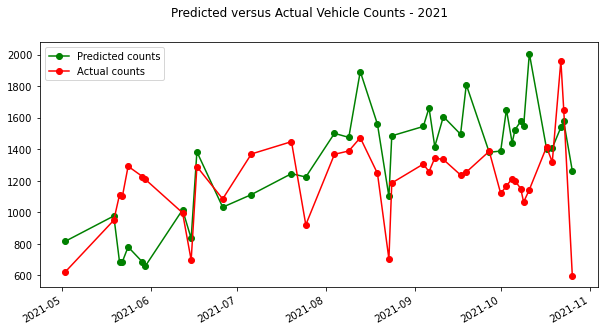

In [36]:
predicted_counts=pred_df['prediction']
actual_counts = y_test
predicted_counts.sort_index(inplace=True)
actual_counts.sort_index(inplace=True)
predicted_counts = predicted_counts[predicted_counts.index.year==2021]
actual_counts = actual_counts[actual_counts.index.year==2021]
fig = plt.figure(figsize=(10,5))
fig.suptitle('Predicted versus Actual Vehicle Counts - 2021')
predicted, = plt.plot(predicted_counts.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(actual_counts.index, actual_counts, 'ro-', label='Actual counts')
fig.autofmt_xdate()
plt.legend(handles=[predicted, actual])
plt.show()

In [37]:
sqrt(mean_squared_error(y_test, pred_df['prediction']))

421.5666572106763

In [42]:
out_sample = pd.read_csv('/Users/sitanshurupani/Data Science Coursework/Sem 4/GQP - National Parks/DataSpell Project/Data/out_of_sample.csv')
out_sample.set_index('Full_Date', inplace=True)

In [43]:
y_out_of_sample = pd.DataFrame(pr.predict(out_sample))